In [1]:
## standart libraries

import os,sys
import numpy as np


# xarray
import xarray as xr
import datetime
# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cartopy.feature as cfeature

# for jupyter notebook display
%matplotlib inline

In [2]:
import cmocean.cm as cmo


In [3]:
from dask.distributed import Client
c = Client()
c

/linkhome/rech/genlop01/uor98hu/.local/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38387 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:38387/status,
Dashboard: http://127.0.0.1:38387/status,Workers: 5
Total threads: 10,Total memory: 20.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39569,Workers: 5
Dashboard: http://127.0.0.1:38387/status,Total threads: 10
Started: Just now,Total memory: 20.00 GiB
Comm: tcp://127.0.0.1:38009,Total threads: 2
Dashboard: http://127.0.0.1:42463/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:39007,


# Loading data

In [4]:
prefix = "eORCA025.L75-IMHOTEP"
diridatref="/gpfsstore/rech/cli/rcli002/eORCA025.L75/"+prefix+"."  
fo='1m'

# GAI
filepathREF = diridatref+"GAI-S/"+fo+"/????/"+prefix+".GAI_y*m*.1m_icemod.nc"
GAIdsmonth = xr.open_mfdataset(filepathREF,chunks={"time_counter":1}, parallel=True)

# AI
filepath = diridatref+"AI-S/"+fo+"/????/"+prefix+".AI_y*m*.1m_icemod.nc"
AIdsmonth = xr.open_mfdataset(filepath,chunks={"time_counter":1}, parallel=True)

# S
filepathS = diridatref+"S-S/"+fo+"/????/"+prefix+".S_y*m*.1m_icemod.nc"
Sdsmonth = xr.open_mfdataset(filepathS,chunks={"time_counter":1}, parallel=True)


In [5]:
GAIvoln    = GAIdsmonth.sivoln.groupby('time_counter.year').mean('time_counter').compute()
GAIarean   = GAIdsmonth.siarean.groupby('time_counter.year').mean('time_counter').compute()
GAIextentn = GAIdsmonth.siextentn.groupby('time_counter.year').mean('time_counter').compute()

AIvoln    = AIdsmonth.sivoln.groupby('time_counter.year').mean('time_counter').compute()
AIarean   = AIdsmonth.siarean.groupby('time_counter.year').mean('time_counter').compute()
AIextentn = AIdsmonth.siextentn.groupby('time_counter.year').mean('time_counter').compute()

Svoln    = Sdsmonth.sivoln.groupby('time_counter.year').mean('time_counter').compute()
Sarean   = Sdsmonth.siarean.groupby('time_counter.year').mean('time_counter').compute()
Sextentn = Sdsmonth.siextentn.groupby('time_counter.year').mean('time_counter').compute()

ts_GAI_seaice.png


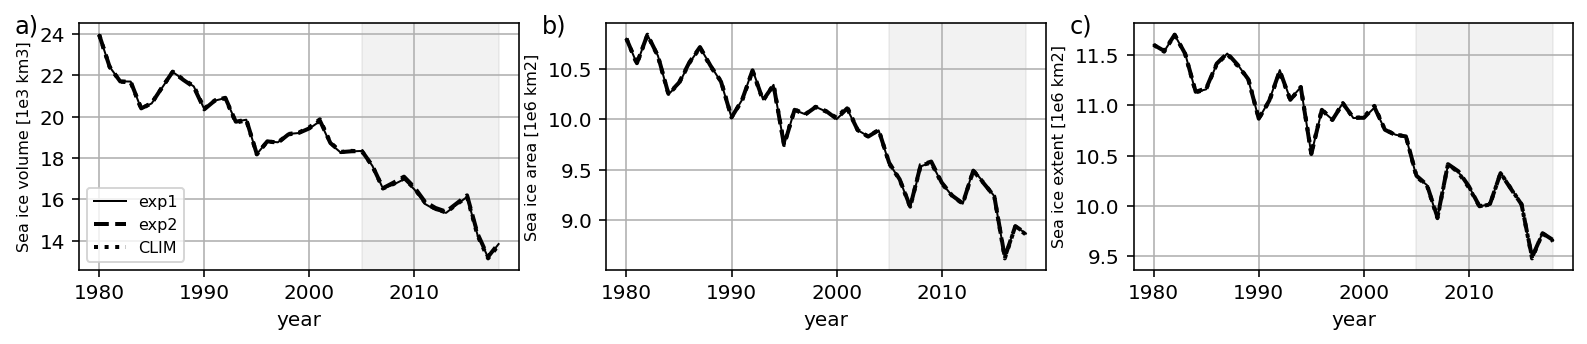

In [21]:
diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/" # plot directory
namo = 'ts_GAI_seaice.png'
print(namo)

cmmm = 1/2.54  # centimeters in inches
fig,(ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(34*cmmm, 5.75*cmmm), facecolor='none', dpi=72*2)

GAIvoln.plot(ax=ax1, color='k',linewidth=1)
GAIarean.plot(ax=ax2, color='k',linewidth=1)
GAIextentn.plot(ax=ax3, color='k',linewidth=1)

AIvoln.plot(ax=ax1, color='k',linestyle='dashed',linewidth=2)
AIarean.plot(ax=ax2, color='k',linestyle='dashed',linewidth=2)
AIextentn.plot(ax=ax3, color='k',linestyle='dashed',linewidth=2)

Svoln.plot(ax=ax1, color='k',linestyle='dotted',linewidth=2)
Sarean.plot(ax=ax2, color='k',linestyle='dotted',linewidth=2)
Sextentn.plot(ax=ax3, color='k',linestyle='dotted',linewidth=2)

ax1.grid()
ax2.grid()
ax3.grid()

#ax1.set_title('')
ax1.set_ylabel('Sea ice volume [1e3 km3]',fontsize=8)
ax2.set_ylabel('Sea ice area [1e6 km2]',fontsize=8)
ax3.set_ylabel('Sea ice extent [1e6 km2]',fontsize=8)

ax1.legend(['exp1','exp2','CLIM'],fontsize=8,loc="lower left") 

ax1.axvspan(2005, 2018, color="grey", alpha=0.1)
ax2.axvspan(2005, 2018, color="grey", alpha=0.1)
ax3.axvspan(2005, 2018, color="grey", alpha=0.1)

ax1.text(-0.12, 0.99, 'a)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(-0.12, 0.99, 'b)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax3.text(-0.12, 0.99, 'c)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
plt.close(fig)

# maps of sea ice volume

In [6]:
GAIsivolu = GAIdsmonth.sivolu.groupby('time_counter.year').mean('time_counter')
AIsivolu = AIdsmonth.sivolu.groupby('time_counter.year').mean('time_counter')
Ssivolu = Sdsmonth.sivolu.groupby('time_counter.year').mean('time_counter')

In [7]:
GAIpolyfit_results = GAIsivolu.polyfit(dim='year', deg=1).polyfit_coefficients.compute()
AIpolyfit_results = AIsivolu.polyfit(dim='year', deg=1).polyfit_coefficients.compute()
Spolyfit_results = Ssivolu.polyfit(dim='year', deg=1).polyfit_coefficients.compute()

In [8]:
GR_RIV = GAIpolyfit_results - Spolyfit_results
GREENLAND = GAIpolyfit_results - AIpolyfit_results
RIVERS = AIpolyfit_results - Spolyfit_results

In [87]:
print(GAIpolyfit_results[0].where(BGRmask,drop=True).mean().values*100)
print(GR_RIV[0].where(BGRmask,drop=True).mean().values*100)
print(GREENLAND[0].where(BGRmask,drop=True).mean().values*100)
print(RIVERS[0].where(BGRmask,drop=True).mean().values*100)

-0.8685890433165037
-0.07259134775486144
-0.057989069374022144
-0.014602278380839304


In [91]:
meanEXP1 = GAIpolyfit_results[0].where(BGRmask,drop=True).mean().values*100
print(((GR_RIV[0].where(BGRmask,drop=True).mean().values*100)/meanEXP1)*100)
print(((GREENLAND[0].where(BGRmask,drop=True).mean().values*100)/meanEXP1)*100)
print(((RIVERS[0].where(BGRmask,drop=True).mean().values*100)/meanEXP1)*100)

8.357386996005427
6.676237723723117
1.681149272282313


In [97]:
print(GAIpolyfit_results[0].where(nav_lat>0,drop=True).mean().values*100)
print(GR_RIV[0].where(nav_lat>0,drop=True).mean().values*100)
print(GREENLAND[0].where(nav_lat>0,drop=True).mean().values*100)
print(RIVERS[0].where(nav_lat>0,drop=True).mean().values*100)

-1.208626706994047
0.001475303846701257
-0.014287078664617635
0.0157483692804968


In [96]:
meanEXP1arctic = GAIpolyfit_results[0].where(nav_lat>0,drop=True).mean().values*100
print(((GR_RIV[0].where(nav_lat>0,drop=True).mean().values*100)/meanEXP1arctic)*100)
print(((GREENLAND[0].where(nav_lat>0,drop=True).mean().values*100)/meanEXP1arctic)*100)
print(((RIVERS[0].where(nav_lat>0,drop=True).mean().values*100)/meanEXP1arctic)*100)

-0.1220644751736835
1.1820919215123717
-1.3029969625331446


(array([2.00000e+00, 0.00000e+00, 3.00000e+00, 7.80000e+01, 3.03928e+05,
        3.30000e+01, 9.00000e+00, 7.00000e+00, 1.10000e+01, 4.00000e+00]),
 array([-8.38096271, -6.51624668, -4.65153065, -2.78681462, -0.92209859,
         0.94261745,  2.80733348,  4.67204951,  6.53676554,  8.40148157,
        10.2661976 ]),
 <BarContainer object of 10 artists>)

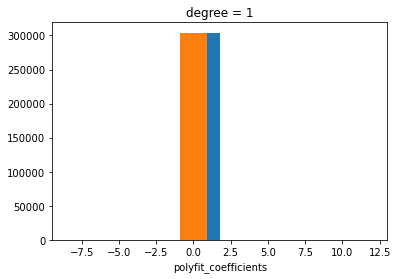

In [39]:
(GR_RIV[0]*100).plot.hist()
(GREENLAND[0]*100).plot.hist()
#(RIVERS[0]*100).plot.hist()

In [76]:
# in percentage
GR_RIVperc    = (np.abs(GR_RIV    / GAIpolyfit_results) )* 100
GREENLANDperc = np.abs(GREENLAND / GAIpolyfit_results) * 100
RIVERSperc    = np.abs(RIVERS    / GAIpolyfit_results) * 100


In [81]:
(0.5*100) /5

10.0

(array([3.03359e+05, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([8.87788023e-07, 5.51847761e+11, 1.10369552e+12, 1.65554328e+12,
        2.20739105e+12, 2.75923881e+12, 3.31108657e+12, 3.86293433e+12,
        4.41478209e+12, 4.96662985e+12, 5.51847761e+12]),
 <BarContainer object of 10 artists>)

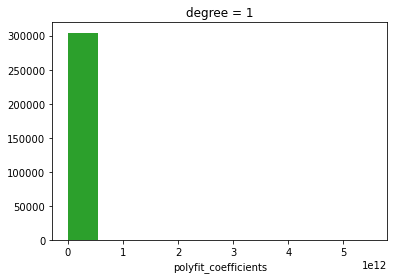

In [78]:
(GR_RIVperc[0]).plot.hist()
(GREENLANDperc[0]).plot.hist()
(RIVERSperc[0]).plot.hist()

In [68]:
# read grid files
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
tmask = xr.open_dataset(diri+'mesh_hgr.nc')['tmask'][0,0,:,:] # grille lat/lon
nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']
mbathy = xr.open_dataset(diri+'eORCA025.L75_domain_cfg_closed_seas_greenland.nc')['bathy_meter'].isel(t=0) # grille lat/lon

BGRmask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/TRANSPORT_WP1/BGRmaskobs.nc').BGRmask.squeeze()
# default gridlines parameters
gridl=False
incrgridlon=30
incrgridlat=10

# vue N.Atl
# loncentr=330 # before it was zero
# latcentr=70

#vue polaire
loncentr=200 # before it was zero
latcentr=90

sath=2085831

In [28]:
#========= Plot settings ===============
# colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [29]:
y1='1980'; y2="2018"

# plot GAI trend map

In [98]:
cmap = cm.RdYlBu_r

my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

lmin = -5
incr = 0.5
lmax = lmin*(-1)+0.1
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [ ]:
#========= CREATE FIGURE
data2plot = (Spolyfit_results[0]*100).squeeze()#.where(tmask!=0,0).squeeze()
namo  ="clim_trendseaicevolumemap_"+y1+"-"+y2+".png"

print(namo)
#===========================================
fig = plt.figure(figsize=([18,10]),facecolor='none', dpi=72*2)

trdata  = ccrs.PlateCarree() # Data system proj (if coords are in lat lon, use PlateCarre here)
ax = plt.axes(projection= ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath))

#========= PLOT DATA

ax.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = plt.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = cmap,transform=trdata, norm=norm)
cbar = fig.colorbar(cs,extend='both', ticks=bounds)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'Exp1 sea ice volume per area trends over '+y1+'-'+y2+' [cm/yr]', fontsize=20)
# cbar.set_label(r'RIVERS SSH trends over '+y1+'-'+y2+' [mm/yr]', fontsize=20)
# cbar.set_label(r'GR+RIVERS SSH trends over '+y1+'-'+y2+' [mm/yr]', fontsize=20)

#========= coastlines and gridlines
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
clr2 = ax.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2 = ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style; gl.ylabel_style = label_style


#============= BATHYMETRY
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']
# west
Ct1 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
# east
Ct2 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

# plt.title(tlabel,fontsize=24)
#plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
plt.close(fig)
# plt.clf()

clim_trendseaicevolumemap_1980-2018.png


# plot différence maps

In [48]:
cmap = cm.RdYlBu_r

my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

lmin = -0.5
incr = 0.1
lmax = lmin*(-1)+0.1
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [50]:
trdata  = ccrs.PlateCarree() 
proj = ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath)
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']

cmmm = 1/2.54  # centimeters in inches
#fig, (axa,axb,axc) = plt.subplots(1, 3,figsize=(34*cmmm, 5.75*cmmm),facecolor='none', dpi=72*2,subplot_kw={'projection': proj})
#plt.subplots_adjust(wspace=0, hspace=0.1)

fig, (axa,axb,axc) = plt.subplots(1, 3,figsize=(22,6),facecolor='none',dpi=72*2,subplot_kw={'projection': proj})
plt.subplots_adjust(wspace=0, hspace=0.1)

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)
axc.text(-0.02, 0.98, 'c)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axc.transAxes)

# ========GAI-S
data2plot = ((GR_RIV[0]*100)).squeeze()
axa.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axa.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axa.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axa.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axa.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axa.set_title("Gr+Riv", fontsize=24) 

# ========GAI-AI
data2plot = ((GREENLAND[0]*100)).squeeze()
axb.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axb.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axb.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axb.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axb.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axb.set_title("GREENLAND", fontsize=24) 

# ========AI-S
data2plot = ((RIVERS[0]*100)).squeeze()
axc.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axc.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axc.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axc.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axc.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axc.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axc.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

cbar = fig.colorbar(cs,extend='both', ticks=bounds, ax=axc, cax = axc.inset_axes([1.1, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.set_label(r'Sea ice volume per area trends over '+y1+'-'+y2+' [cm/yr]', fontsize=14)

axc.set_title("RIVERS", fontsize=24) 


namo="seaicemapsdiff.png"
#plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
plt.close(fig)

# plot difference maps en pourcentage

In [61]:
cmap = cm.RdYlBu_r

my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

lmin = -10
incr = 0.1
lmax = lmin*(-1)+0.1
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

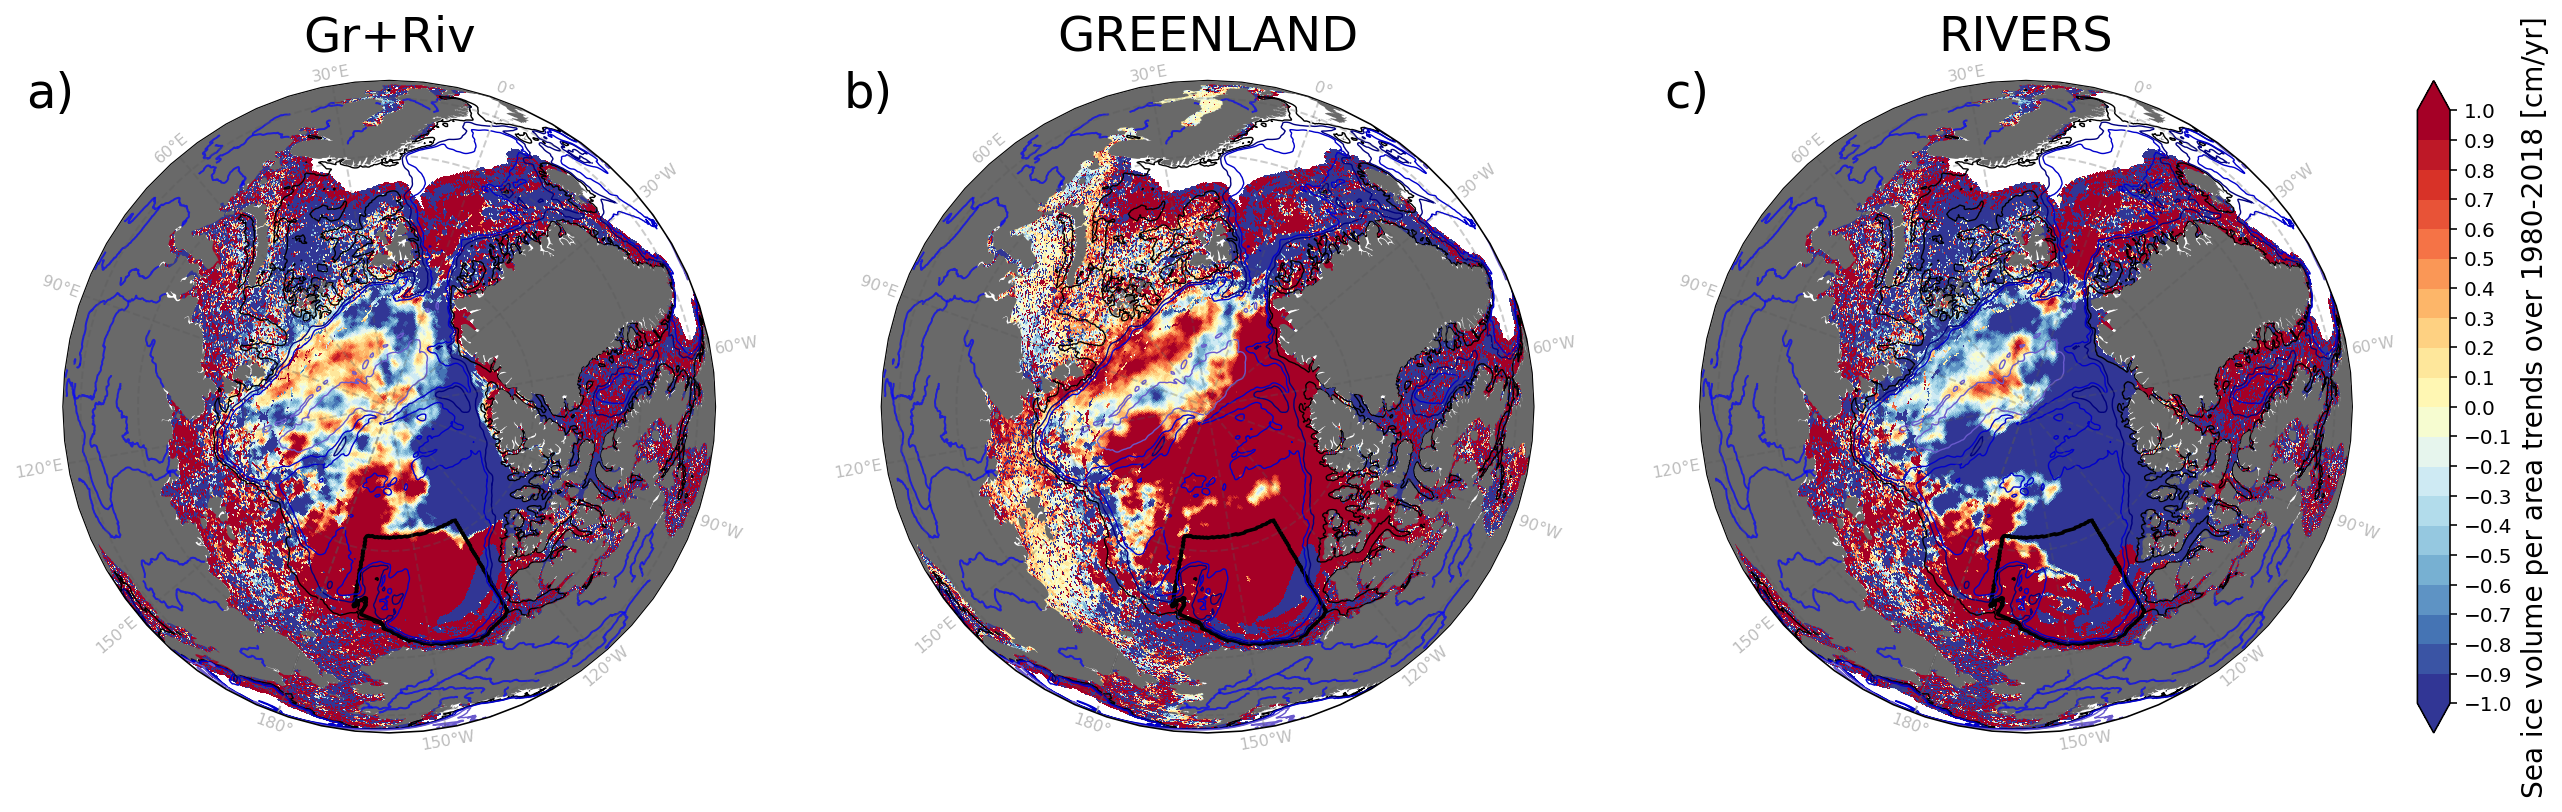

In [62]:
trdata  = ccrs.PlateCarree() 
proj = ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath)
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']

cmmm = 1/2.54  # centimeters in inches
#fig, (axa,axb,axc) = plt.subplots(1, 3,figsize=(34*cmmm, 5.75*cmmm),facecolor='none', dpi=72*2,subplot_kw={'projection': proj})
#plt.subplots_adjust(wspace=0, hspace=0.1)

fig, (axa,axb,axc) = plt.subplots(1, 3,figsize=(22,6),facecolor='none',dpi=72*2,subplot_kw={'projection': proj})
plt.subplots_adjust(wspace=0, hspace=0.1)

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)
axc.text(-0.02, 0.98, 'c)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axc.transAxes)

# ========GAI-S
data2plot = ((GR_RIVperc[0])).squeeze()
axa.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axa.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axa.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axa.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axa.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axa.set_title("Gr+Riv", fontsize=24) 

# ========GAI-AI
data2plot = ((GREENLANDperc[0])).squeeze()
axb.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axb.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axb.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axb.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axb.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axb.set_title("GREENLAND", fontsize=24) 

# ========AI-S
data2plot = ((RIVERSperc[0])).squeeze()
axc.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axc.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axc.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axc.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axc.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axc.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axc.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

cbar = fig.colorbar(cs,extend='both', ticks=bounds, ax=axc, cax = axc.inset_axes([1.1, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.set_label(r'Sea ice volume per area trends over '+y1+'-'+y2+' [cm/yr]', fontsize=14)

axc.set_title("RIVERS", fontsize=24) 


namo="seaicemapsdiffperc.png"
plt.show()
#fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
plt.close(fig)